In [4]:
import warnings
from glob import glob
from src.read import get_data, check_validity
from src.plot import cost_breakdown, R1_pareto, compare, plt, emissions_pareto

warnings.filterwarnings("ignore")

In [5]:
def import_folder(f_path):
    datalist = []
    colors = ['blue','orange','green','brown','yellow']
    count = 0
    for folder in glob(f"{f_path}/*"):
        label = folder.split("/")[-1]
        content = []
        for file in glob(folder+"/designs/*.mat"):
            isValid = check_validity(file)
            if isValid:
                data = get_data(file)
                print(file,data["costs"]["LCAC_nom"], data["risk"]["f_emissions"])
                content.append(data)
        datalist.append({"label" : label, "data":content, "color": colors[count]})
        count += 1
    return datalist

./inputs/Envir/16_EnvirAll/designs/20210921_design_Input_19_05_21.mat_e5.mat 467.62423708309984 529578.5201765802
./inputs/Envir/16_EnvirAll/designs/20210921_design_Input_19_05_21.mat_e4.mat 386.01103053459025 529784.8627331249
./inputs/Envir/16_EnvirAll/designs/20210921_design_Input_19_05_21.mat_e6.mat 188.19797587108764 1356923.8509218693
./inputs/Envir/16_EnvirAll/designs/20210921_design_Input_19_05_21.mat_e3.mat 278.81268612690894 529768.9738417069
./inputs/Envir/16_EnvirAll/designs/20210921_design_Input_19_05_21.mat_e1.mat 499.7782049400498 529545.8387785514
./inputs/Envir/16_EnvirAll/designs/20210921_design_Input_19_05_21.mat_e2.mat 190.11412023002202 529608.3393627948


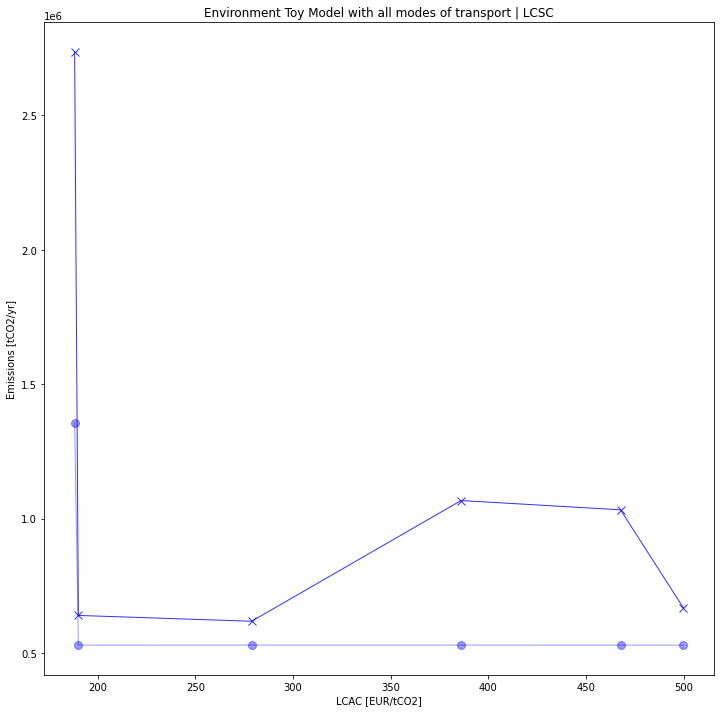

In [6]:
plot = emissions_pareto(import_folder("./inputs/Envir"),title="Environment Toy Model with all modes of transport | LCSC", return_plot=True)